In [1]:
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [2]:
import torch
torch.cuda.is_available()

True

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

seed = 42

In [5]:
iris = load_iris()
idxs = np.where(iris.target<2)
x = iris.data[idxs]
y = iris.target[idxs]

In [8]:
y.shape

(100,)

<function matplotlib.pyplot.show(close=None, block=None)>

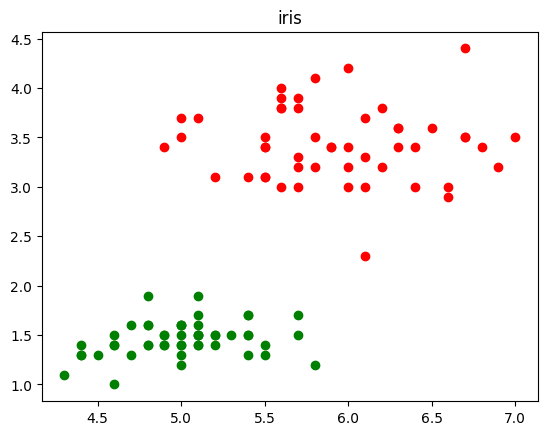

In [9]:
plt.scatter(x[y==0][:,0], x[y==0][:,2],color='green',label='iris-s') 
plt.scatter(x[y==1][:,0], x[y==0][:,1],color='red',label='iris-v')
plt.title('iris')
plt.show

In [10]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=seed)

In [25]:
weights = np.random.normal(size=x_train.shape[1])
bias = 1

In [22]:
learning_rate = 0.1 
n_epoch = 15

In [37]:
del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

In [38]:
for i in range(n_epoch):
    output = np.where((x_train.dot(weights)+bias) > 0.5, 1, 0)
    
    #mse
    error = np.mean((y_train-output)**2)

    #update
    weights -= learning_rate * np.dot((output-y_train),x_train)
    bias += learning_rate * np.sum(np.dot((output-y_train),x_train))

    loss = np.mean((y_train-output)**2)
    hist_loss.append(loss)

    #acc
    output_val = np.where(x_val.dot(weights) > 0.5, 1, 0)
    accuracy = np.mean(np.where(y_val==output_val,1,0))
    hist_accuracy.append(accuracy)

ValueError: operands could not be broadcast together with shapes (80,) (4,) 

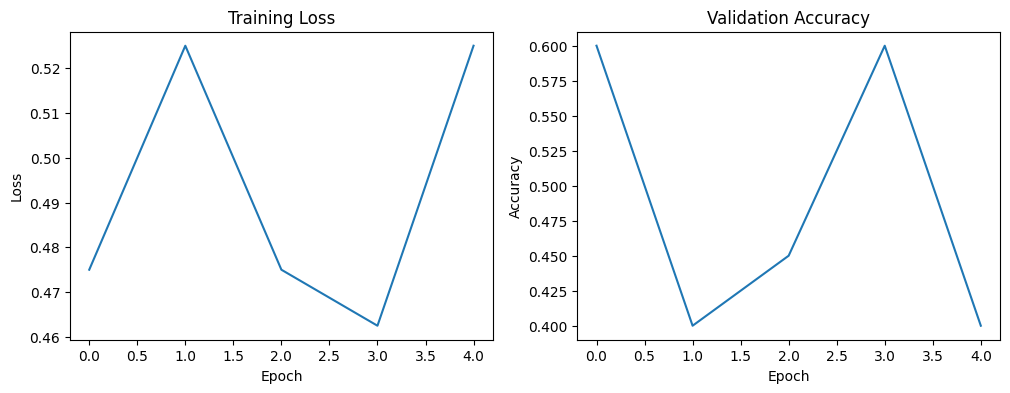

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

seed = 42

iris = load_iris()
idxs = np.where(iris.target < 2)
x = iris.data[idxs]
y = iris.target[idxs]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=seed)
weights = np.random.normal(size=x_train.shape[1])
bias = 1
learning_rate = 0.01
n_epoch = 5
del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

for i in range(n_epoch):
    output = np.where(x_train.dot(weights) + bias > 0.5, 1, 0)

    # mse
    error = np.mean((y_train - output) ** 2)

    # update weights
    weights -= learning_rate * np.dot((output - y_train), x_train)
    
    # update bias
    bias -= learning_rate * np.sum(output - y_train)

    loss = np.mean((y_train - output) ** 2)
    hist_loss.append(loss)

    # accuracy
    output_val = np.where(x_val.dot(weights) + bias > 0.5, 1, 0)
    accuracy = np.mean(np.where(y_val == output_val, 1, 0))
    hist_accuracy.append(accuracy)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(hist_accuracy)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


In [2]:
#实现一个单层的神经网络
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [3]:
X,y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=42)
outer = y == 0
inner = y == 1

In [4]:
X.shape
y.shape

(400,)

In [5]:
y

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

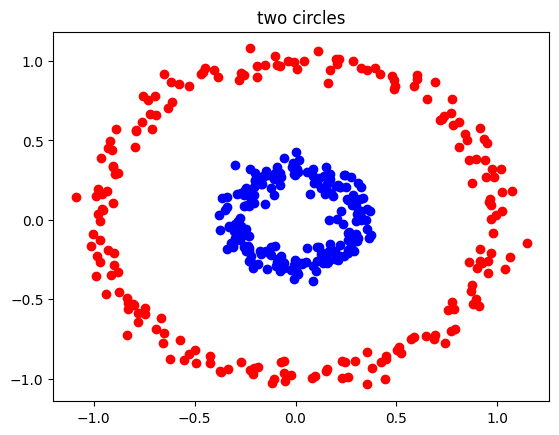

In [6]:
plt.title('two circles')
plt.plot(X[outer,0], X[outer,1], 'ro')
plt.plot(X[inner,0], X[inner,1], 'bo')
plt.show()

In [7]:
#标准化数据
X = X + 1

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [23]:
n_hidden = 50
n_epoch = 5000
learning_rate = 0.01

In [14]:
#初始化权重变量
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1],n_hidden))
weights_output = np.random.normal(0.0,size=(n_hidden))
hist_loss = []
hist_accuracy = []

In [13]:
weights_hidden.shape

(2, 50)

In [15]:
weights_output.shape

(50,)

In [17]:
for e in range(n_epoch):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    for x_, y_ in zip(X_train, y_train):
        #forwoar
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_input, weights_output))

        #backward
        error = y - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1-hidden_output)
        
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:,None]

        weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
        weights_output += learning_rate * del_w_output / X_train.shape[0]

        if e%100 == 0:
            hidden_output = sigmoid(np.dot(X_val,weights_hidden))
            out = sigmoid(np.dot(hidden_output, weights_output))
            loss = np.mean((out-y_val)**2)

            predictions = out > 0.5
            accuracy = np.mean(predictions == y_val)
            print('Epoch: ', '{:>4}'.format(e), "; Validation loss :", '{:>6}'.format(loss.round(4)),'{:>6}'.format(accuracy.round(4)))
                    

ValueError: shapes (400,) and (50,) not aligned: 400 (dim 0) != 50 (dim 0)

In [24]:
# Correcting the gradient calculation for hidden layer weights

for e in range(n_epoch):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    for x_, y_ in zip(X_train, y_train):
        # Forward pass
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))

        # Backward pass
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(weights_output, output_error) * sigmoid_derivative(hidden_input)
        
        # Gradient update
        del_w_output += output_error * hidden_output
        del_w_hidden += np.outer(x_, hidden_error)

    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Validation
    if e % 100 == 0:
        hidden_output_val = sigmoid(np.dot(X_val, weights_hidden))
        out_val = sigmoid(np.dot(hidden_output_val, weights_output))
        loss = np.mean((out_val - y_val) ** 2)

        predictions = out_val > 0.5
        accuracy = np.mean(predictions == y_val)
        print('Epoch: ', '{:>4}'.format(e), "; Validation loss :", '{:>6}'.format(loss.round(4)), '{:>6}'.format(accuracy.round(4)))

# Return the final validation accuracy and loss for evaluation
(loss, accuracy)


Epoch:     0 ; Validation loss : 0.2062  0.775
Epoch:   100 ; Validation loss : 0.2058  0.775
Epoch:   200 ; Validation loss : 0.2054  0.775
Epoch:   300 ; Validation loss :  0.205  0.775
Epoch:   400 ; Validation loss : 0.2046  0.775
Epoch:   500 ; Validation loss : 0.2043  0.775
Epoch:   600 ; Validation loss : 0.2039  0.775
Epoch:   700 ; Validation loss : 0.2035  0.775
Epoch:   800 ; Validation loss : 0.2031  0.775
Epoch:   900 ; Validation loss : 0.2027  0.775
Epoch:  1000 ; Validation loss : 0.2024  0.775
Epoch:  1100 ; Validation loss :  0.202  0.775
Epoch:  1200 ; Validation loss : 0.2016  0.775
Epoch:  1300 ; Validation loss : 0.2012  0.775
Epoch:  1400 ; Validation loss : 0.2009  0.775
Epoch:  1500 ; Validation loss : 0.2005  0.775
Epoch:  1600 ; Validation loss : 0.2001  0.775
Epoch:  1700 ; Validation loss : 0.1998  0.775
Epoch:  1800 ; Validation loss : 0.1994  0.775
Epoch:  1900 ; Validation loss :  0.199  0.775
Epoch:  2000 ; Validation loss : 0.1987  0.775
Epoch:  2100 

(0.18824800686863133, 0.775)